# Generative Models

## Discriminative Models

**Discriminative models** are typically used for **classification** in machine learning. They learn how to **distinguish between classes** $Y$ given a set of **features** $X$:

$$
X \to Y
$$

In other words, they model a **probability** $P$ of a class $Y$ given a set of features $X$:

$$
P(Y|X)
$$

## Generative Models

**Generative models** try to learn how to make a **realistic representation** of some class: 

$$
\xi, Y \to X
$$

They take some **random noise** input $\xi$ (greek letter 'xi') and sometimes a **class** $Y$. From these inputs, it's goal is to generate a set of **features** $X$ that look realistic. The noise is to ensure that what's generated isn't actually the same each time.

More generally, generative models try to capture the **probability distribution** of the **features** $X$ given a **class** $Y$:

$$
P(X|Y)
$$

If you're only generating **one class**, it's just the probability over all the features $X$:

$$
P(X)
$$

### Variational Autoencoders - VAE

There are many types of generative models, the most popular ones are **variational autoencoders** (VAE) and **generative adversarial networks** (GAN).

VAEs contain two neural networks, an **encoder** and a **decoder**. They learn first by feeding in realistic images into the encoder to find a good way of representing that image in a **latent space**. A point in the latent space can be represented by a **vector**.

The VAE takes this latent representation, or a point close to it, and put it through the **decoder**. The goal of the decoder is to reconstruct the realistic image that the encoder saw before. 

After training of the decoder, we remove the encoder and we can pick random points in the latent space, and the decoder will have learned to produce an image of a dog. 

The **variational** part actually inject **some noise** into this whole model and training process. Instead of having the encoder encode the image into a single point in that latent space, the encoder actually encodes the image onto a whole **distribution** and then samples a point on that distribution to feed into the decoder to then produce a realistic image.

A good distribution over the latent space is important for VAEs. 

### Generative Adversarial Networks - GAN

The **generator** takes in some random noise input. As an output it generate an image over time. The **generator** is in some sense similar to the **decoder in a VAE**. What's different is that there's no guiding encoder that determines what the noise vector should look like, that's input into the generator. 

Instead, there's a discriminator looking at **fake** and **real** images trying to figure out which ones are real and which ones are fake. Over time, each model tries to one up each other. These models compete against each other which is why they're called **adversarial**.

The two models compete with each other and reach a point where realistic examples are produced by the generator.

## BCE Cost Function

The **Binary Cross Entropy** function (BCE) is used for training GANs. It's useful for these models, because it is designed for classification tasks, where there are **two categories** like real and fake.

The BCE calculates as

$$
\begin{align}
J(\theta) &= -\frac{1}{m} \sum_{i=1}^m \big(y_i log(\hat{y}_i) + (1 - y_i) \, log(1 - \hat{y}_i)\big) \\
&= -\frac{1}{m} \sum_{i=1}^m \big(y_i log(h(x_i, \theta)) + (1 - y_i \, log(1 - h(x_i, \theta))\big)
\end{align}
$$

with the number of examples $m$ in the entire **batch**, the **prediction** $\hat{y}$, the **label** $y$, the **features** $x$ and the **parameters** $\theta$

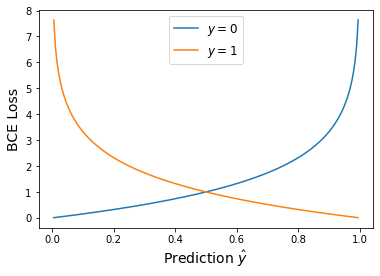

In [26]:
import numpy as np
import matplotlib.pyplot as plt

y_hat = np.linspace(0, 1, 200)[1:-1]
bce = lambda y, y_hat: - y * np.log2(y_hat) - (1 - y) * np.log2(1 - y_hat)

plt.xlabel(r'Prediction $\hat{y}$', fontsize=14)
plt.ylabel('BCE Loss', fontsize=14)
plt.plot(y_hat, bce(0, y_hat), label=r'$y = 0$')
plt.plot(y_hat, bce(1, y_hat), label=r'$y = 1$')
plt.legend(fontsize='large');

The BCE function has two parts, one relevant for each **class** label $y=0$ and $y=1$. 

It is close to **zero**, when label $y$ and prediction $\hat{y}$ are **similar**. It is **infinity**, when the label $y$ and prediction $\hat{y}$ are **different**.